In [13]:
import torch
import torchvision

from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

Download MNIST

In [14]:
dataset = MNIST(root='data/', download=True)

Get test dataset only

In [5]:
print(len(dataset))

test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

60000
10000


In [6]:
test_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F180426F908>, 7)

MNIST we download are PIL.Image object
Though we can Display it
however we can't just put into learning model

Label: 5


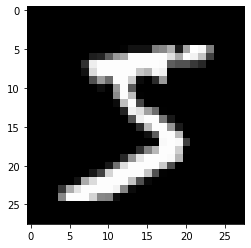

In [15]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

## torchvision.transforms
make the MNIST PIL.image object to value data(tensors)

In [8]:
import torchvision.transforms as transforms

dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


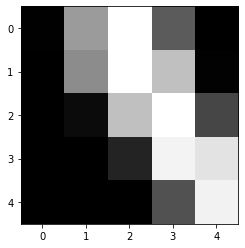

In [10]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Split dataset to 3 parts
1. Training set
2. Validation set
3. Testing Set

## Split validation and training by hand
And we shuffle the data first(by index)

In [16]:
import numpy as np

def spilit_indices(n, val_percent):

    validation_n = int(val_percent * n)

    # just shuffle the list of [0,1,...,n-1]
    idxs = np.random.permutation(n)

    # [n : ] skip first n
    # [ : n] from 0 to n
    return idxs[validation_n:], idxs[:validation_n]

In [17]:
train_indices, validation_indices = spilit_indices(len(dataset), val_percent=0.2)

print(len(train_indices), len(validation_indices))
print('Smaple validation indices: ', validation_indices[:20])

48000 12000
Smaple validation indices:  [47934 57847 44800 34045 20930 41003  1623 40481 54629 14096 22280 31671
   340 59896 27401 38173  8357 22344  6699 10935]


`SubsetRandomSampler` using indices to sample data
and randomly, so the shuffle indices might be redundant.

In [25]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 100

# Combine sampler(using indices) and data loader
# Training
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

# Validation
val_sampler = SubsetRandomSampler(validation_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler=val_sampler)

## split data using utils
`torch.utils.data.random_split`

can split dataset into validation set and training set as well

In [11]:
# Spliting Training and Validation datasets
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [35]:
# DataLoader
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle=True)

## Logistic regression model
* almost like linear regression
* we **flatten** the 1x28x28 image tensor to 784
* output is vector of size 10, signifying the probability of target label(from 0 to 9)

In [28]:
import torch.nn as nn

input_size = 1*28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [32]:
# checkout the weight and bias
print("weight:")
print(model.weight.shape)
print(model.weight)

print()
print('bias:')
print(model.bias.shape)
print(model.bias)


weight:
torch.Size([10, 784])
Parameter containing:
tensor([[-0.0114,  0.0252,  0.0013,  ...,  0.0232, -0.0160, -0.0148],
        [ 0.0131,  0.0075,  0.0242,  ..., -0.0171, -0.0275, -0.0162],
        [-0.0213, -0.0351,  0.0194,  ...,  0.0332,  0.0075,  0.0137],
        ...,
        [-0.0118,  0.0174, -0.0083,  ...,  0.0161, -0.0346, -0.0112],
        [ 0.0003, -0.0242, -0.0133,  ...,  0.0276,  0.0099,  0.0125],
        [ 0.0267, -0.0125,  0.0165,  ..., -0.0114, -0.0336, -0.0090]],
       requires_grad=True)

bias:
torch.Size([10])
Parameter containing:
tensor([ 0.0332, -0.0251, -0.0232, -0.0202,  0.0184, -0.0339, -0.0169, -0.0187,
         0.0126,  0.0125], requires_grad=True)


In [36]:
# print every label
for images, labels in train_loader:
    print(labels)
    print(images.shape)

    # because the size of input has not been flatten
    outputs = model(images)
    break

tensor([2, 5, 6, 9, 7, 8, 8, 2, 8, 4, 0, 3, 1, 1, 1, 8, 2, 1, 6, 2, 0, 8, 3, 5,
        9, 5, 1, 8, 4, 0, 8, 8, 0, 4, 7, 5, 5, 6, 3, 6, 4, 6, 8, 0, 7, 6, 7, 9,
        7, 5, 7, 1, 6, 0, 0, 9, 3, 1, 1, 2, 7, 8, 9, 7, 7, 8, 4, 0, 7, 0, 0, 7,
        7, 6, 8, 9, 3, 7, 9, 5, 6, 4, 0, 7, 7, 0, 1, 9, 8, 2, 3, 4, 1, 6, 3, 7,
        6, 6, 3, 4, 3, 8, 2, 2, 9, 8, 2, 6, 1, 8, 9, 9, 1, 0, 5, 6, 5, 1, 6, 2,
        1, 6, 1, 5, 7, 1, 2, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [40]:
# we make a model wrap linear model
# and we flatten first and put into linear model after
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):

        # -1 means x, a variable
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)

        return out

model = MnistModel()

In [42]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Smaple outputs : \n', outputs[0])

outputs.shape :  torch.Size([128, 10])
Smaple outputs : 
 tensor([[ 0.0792, -0.4141, -0.0889,  0.1979,  0.3366,  0.3149,  0.2111, -0.1018,
          0.0502,  0.2258],
        [ 0.1057,  0.0639, -0.0675,  0.1130,  0.1097, -0.0673,  0.2626,  0.0764,
          0.2208,  0.1518]])


The output we expect to get is the probabilities.
However, the output here significantly is not probabilities.

So we can put it into **Softmax**
Convert logic score to probabilities.

In [44]:
import  torch.nn.functional as F

probs = F.softmax(outputs, dim=1)
# checkout sample prob.
print("Sample prob : \n", probs[0].data)

# add up the prob of an output row
# verify if equal to 1
print('Sum: ', torch.sum(probs[0]).item())

Sample prob : 
 tensor([0.0976, 0.0596, 0.0825, 0.1099, 0.1262, 0.1235, 0.1114, 0.0814, 0.0948,
        0.1130])
Sum:  1.0


In [45]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 6, 9, 4, 4, 7, 4, 5, 4, 0, 5, 4, 4, 6, 8, 1, 5, 5, 1, 8, 4, 4, 5, 8,
        8, 4, 4, 4, 5, 4, 8, 8, 5, 4, 8, 4, 4, 5, 4, 9, 4, 4, 5, 4, 0, 4, 8, 9,
        4, 5, 4, 5, 8, 4, 8, 4, 6, 4, 3, 6, 8, 4, 6, 5, 4, 4, 6, 4, 8, 9, 4, 4,
        4, 8, 4, 4, 4, 9, 4, 8, 9, 4, 8, 4, 8, 4, 8, 9, 5, 5, 4, 4, 0, 0, 4, 8,
        4, 5, 2, 8, 9, 4, 6, 4, 9, 4, 4, 8, 5, 4, 4, 6, 4, 4, 4, 6, 3, 8, 5, 9,
        4, 5, 4, 8, 8, 1, 4, 6])
tensor([0.1262, 0.1174, 0.1189, 0.1429, 0.1423, 0.1132, 0.1278, 0.1184, 0.1892,
        0.1164, 0.1283, 0.1425, 0.1401, 0.1178, 0.1400, 0.1122, 0.1223, 0.1217,
        0.1350, 0.1295, 0.1340, 0.1423, 0.1434, 0.1394, 0.1243, 0.1343, 0.1650,
        0.1204, 0.1245, 0.1188, 0.1369, 0.1234, 0.1283, 0.1380, 0.1291, 0.1192,
        0.1295, 0.1211, 0.1208, 0.1313, 0.1652, 0.1362, 0.1501, 0.1314, 0.1171,
        0.1241, 0.1273, 0.1173, 0.1216, 0.1157, 0.1453, 0.1248, 0.1358, 0.1365,
        0.1405, 0.1281, 0.1234, 0.1211, 0.1413, 0.1300, 0.1210, 0.1454, 0.1292,
       

## Evaluation Metric and Loss
we use accuracy here.